In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("../datasets/wine_data.csv", header=None, usecols=[0, 1, 2])
df.columns = ["Class label", "Alcohol", "Malic acid"]
print(df.sample(5))
print(df.shape)

    Class label  Alcohol  Malic acid
21            1    12.93        3.80
9             1    13.86        1.35
3             1    14.37        1.95
49            1    13.94        1.73
29            1    14.02        1.68
(178, 3)


## Min-Max Scaling

The formula for standardizing a feature is:

$$
x_i = \frac{x_i - x_{min}}{x_{max} - x_{min}}
$$

$ x_i $ $ \epsilon $ $ [0, 1] $

Where:
- $ x_i $ is the value of the feature,
- $ x_{max} $ is the max value of the feature,
- $ x_{min} $ is the min value of the feature

<Axes: xlabel='Alcohol', ylabel='Density'>

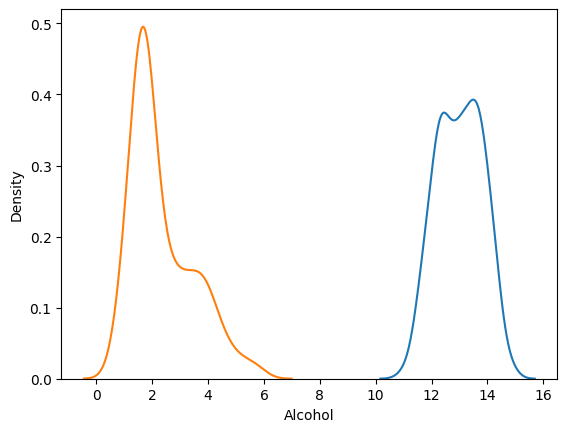

In [12]:
sns.kdeplot(df["Alcohol"])
sns.kdeplot(df["Malic acid"])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

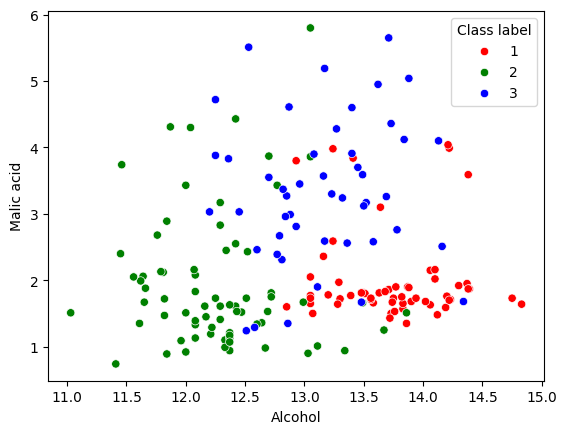

In [18]:
colour_palette = {1: "red", 2: "green", 3: "blue"}
sns.scatterplot(data=df, x = "Alcohol", y = "Malic acid", hue="Class label", palette=colour_palette)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["Class label"]),
    df["Class label"],
    train_size=0.7,
    random_state=0
)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [29]:
X_train.describe()

,Alcohol,Malic acid
count,124.000000,124.000000
mean,12.983065,2.383710
std,0.801340,1.136696
min,11.030000,0.890000
25%,12.362500,1.607500
50%,13.040000,1.885000
75%,13.640000,3.247500
max,14.750000,5.650000


In [30]:
X_train_scaled.describe()

,Alcohol,Malic acid
count,124.000000,124.000000
mean,0.525017,0.313805
std,0.215414,0.238802
min,0.000000,0.000000
25%,0.358199,0.150735
50%,0.540323,0.209034
75%,0.701613,0.495273
max,1.000000,1.000000


Text(0.5, 1.0, 'After Scaling')

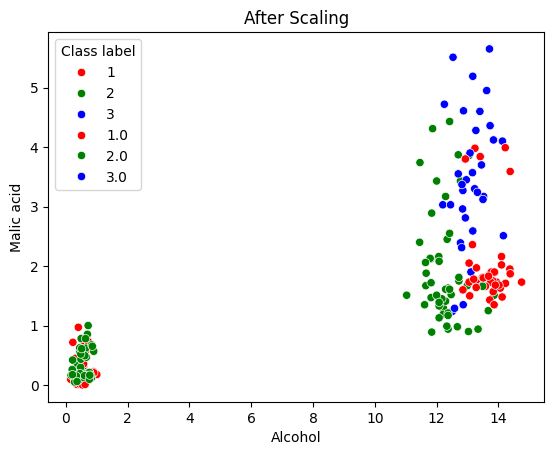

In [39]:
sns.scatterplot(data=X_train, x="Alcohol", y="Malic acid", hue=y_train, palette=colour_palette).set_title("Before Scaling")
sns.scatterplot(data=X_train_scaled, x="Alcohol", y="Malic acid", hue=y_train, palette=colour_palette).set_title("After Scaling")

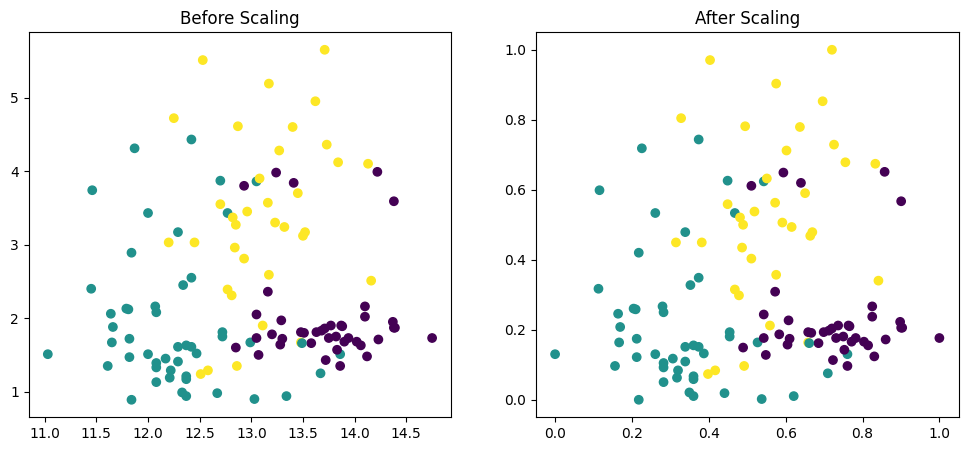

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

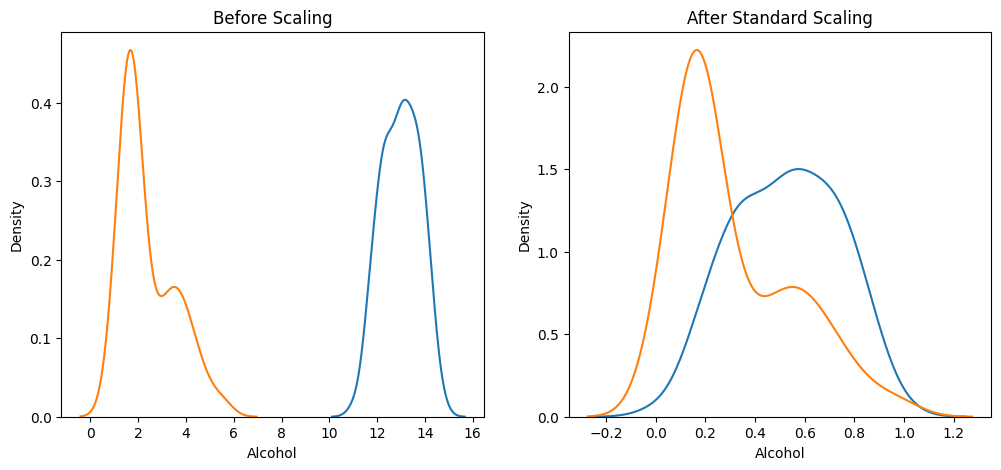

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()